In [120]:
import pandas as pd
import numpy as np
from plotnine import *
#from plotnine.data import *
import matplotlib.pyplot as plt 
import matplotlib
from pandas.api.types import CategoricalDtype
from plotnine import *
from skmisc.loess import loess #提供loess smoothing
import matplotlib as mpl
from mpl_toolkits import mplot3d
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection


mpl.rc('font',size=13)
#设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 三维散点图，两维为数据值，另外一维通过颜色进行展示

In [19]:
df=pd.read_csv("data/Facet_Data.csv")
df

,age,tau,Class,SOD,male
0,0.987624,6.297754,Control,5.609472,0
1,0.986667,6.270988,Control,5.723585,1
2,0.986702,6.152733,Control,5.771441,0
3,0.987163,6.623707,Control,5.655992,0
4,0.985465,5.740789,Control,5.509388,1
...,...,...,...,...,...
328,0.987849,5.767258,Uncertain,5.342334,1
329,0.986684,6.145622,Uncertain,5.347108,0
330,0.988263,5.897676,Uncertain,5.676754,1
331,0.984351,4.805741,Uncertain,4.875197,1


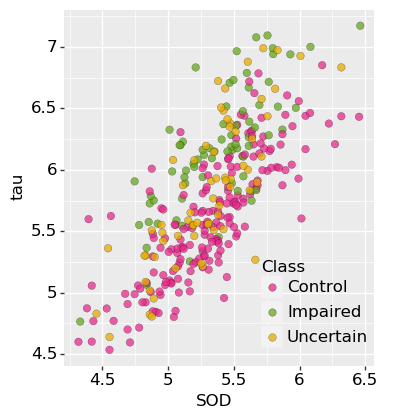

<ggplot: (8778252709921)>


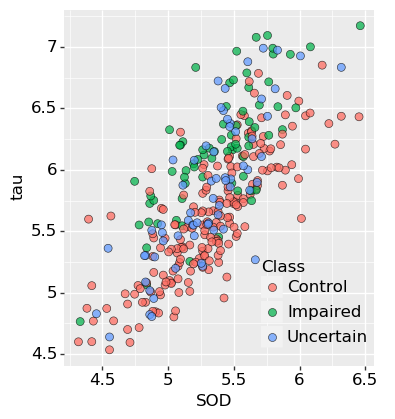

<ggplot: (8778252930721)>


In [40]:
# 根据类别进行展示 离散型变量的展示
p2=(ggplot(df, aes(x='SOD',y='tau',fill='Class'))  
  +geom_point(shape='o',color="black",size=3,
             stroke=0.1,alpha=0.75) #alpha为透明度，stroke为数据黑色边框的变化值
  +scale_fill_manual(values=("#E7298A","#66A61E","#E6AB02"))#填充的色彩值
  +theme(text=element_text(size=12,colour = "black"),
           legend_background=element_blank(),
        legend_position=(0.75,0.25), #图例位置
        aspect_ratio =1.15,
        dpi=100, #分辨率，一般论文要求为300dpi
        figure_size=(4,4))) #shape=21,color="black",fill="red",size=3,stroke=0.1
print(p2)
p2=(ggplot(df, aes(x='SOD',y='tau',fill='Class'))  
  +geom_point(shape='o',color="black",size=3,
             stroke=0.25,alpha=0.75)
  +scale_fill_hue(s = 1, l = 0.65, h=0.0417,color_space='husl')
  +theme(text=element_text(size=12,colour = "black"),
           legend_background=element_blank(),
         legend_position=(0.75,0.25),
        aspect_ratio =1.15,
        dpi=100,
       figure_size=(4,4))) #shape=21,color="black",fill="red",size=3,stroke=0.1
print(p2)
#p2.save('颜色主题方案3.pdf')

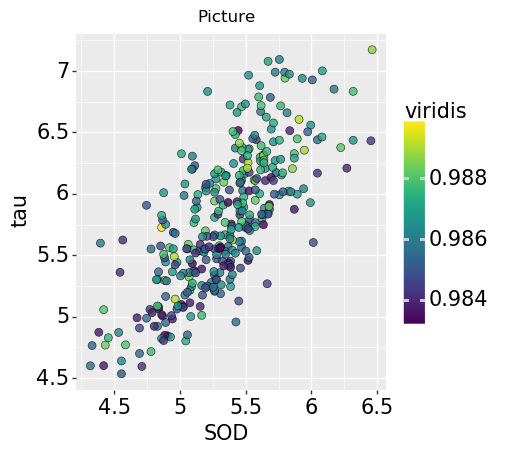

<ggplot: (8778252724773)>


In [26]:
# 根据数值进行颜色展示
p1=(ggplot(df, aes(x='SOD',y='tau',fill='age'))
  +geom_point(shape='o',color="black",size=3,
             stroke=0.25,alpha=0.8)
  +scale_fill_cmap(name='viridis')
  +guides(fill=guide_colorbar(barheight=20, barwidth=10))
  +theme(text=element_text(size=15, colour = "black"),
         legend_background=element_blank(),
         plot_title=element_text(size=12, face="plain", color="black"),
         legend_position=(1.05, 0.5),
        aspect_ratio =1.15,
        dpi=100,
       figure_size=(4,4))
  +ggtitle('Picture')#加上标题
    )
print(p1)

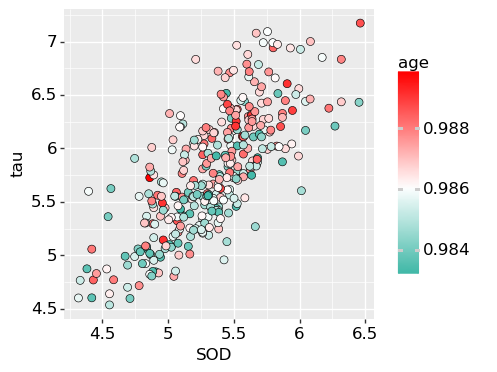

<ggplot: (8778252533633)>


In [34]:
# 另一种数据格式
p2=(ggplot(df, aes(x='SOD',y='tau',fill='age'))  
  +geom_point(shape='o',color="black",size=3,
             stroke=0.25,alpha=1)
  +scale_fill_gradient2(low="#00A08A",mid="white",high="#FF0000",midpoint = np.mean(df.age))
  +guides(fill=guide_colorbar(barheight =20, barwidth=10))
  +theme(text=element_text(size=12,colour = "black"),
         legend_background=element_blank(),
         legend_position=(1.05,0.5),
        aspect_ratio =1, #图像的长宽比
        dpi=100,
       figure_size=(4,4))) #shape=21,color="black",fill="red",size=3,stroke=0.1
print(p2)
# p2.save('颜色主题方案7.pdf

# 散点图的趋势
![](https://tva1.sinaimg.cn/large/007S8ZIlly1gizcsp15hij30dd04qq3j.jpg)

In [85]:
df=pd.read_csv('data/Scatter_Data.csv')
df.head(10)

,x,y
0,1,10.405390
1,2,15.504220
2,3,15.929692
3,4,14.882990
4,5,15.960976
5,6,22.582277
6,7,22.861964
7,8,25.229324
8,9,19.433414
9,10,35.782519


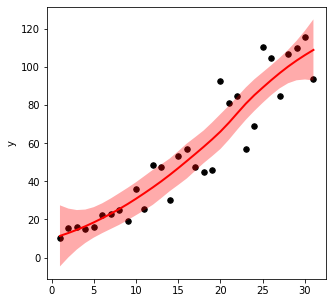

In [94]:
#---------------------------图(f) loess数据平滑曲线-----------------------------
l = loess(df['x'], df['y'])
l.fit()
pred = l.predict(df['x'], stderror=True)
conf = pred.confidence()

y_fit = pred.values
ll = conf.lower
ul = conf.upper

fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'],s=30,c='black')
plt.plot(df['x'], y_fit, color='r',linewidth=2,label='polyfit values')
plt.fill_between(df['x'],ll,ul, facecolor='r', edgecolor='none',interpolate=True,alpha=.33)
plt.ylabel('y')
plt.show()

 
3.52 x - 1.107


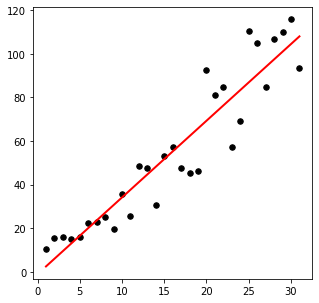

In [87]:
#-----------------------------图(b): 线性拟合曲线--------------------------------
fun = np.polyfit(df['x'], df['y'], 1)
poly= np.poly1d(fun)
print(poly)           #打印出拟合函数
y_fit =poly(df['x'])  #拟合y值


fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'],s=30,c='black')
plt.plot(df['x'], y_fit, color='r',linewidth=2,label='polyfit values')
plt.show()

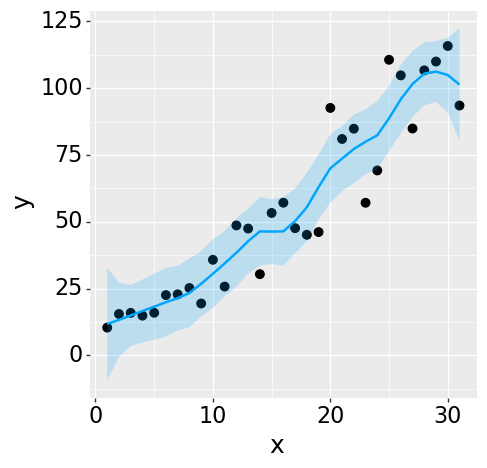

<ggplot: (8778251422217)>


In [88]:
# LOESS局部加权回归
plot_loess=(ggplot( df, aes('x','y')) +
  geom_point(fill="black",colour="black",size=3,shape='o') +
  geom_smooth(method = 'loess',span=0.4,se=True,colour="#00A5FF",fill="#00A5FF",alpha=0.2)+ #(f)
  scale_y_continuous(breaks = np.arange(0, 126, 25))+
  theme(
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       legend_position="none",
       aspect_ratio =1,
       figure_size = (5, 5),
       dpi = 100
       )
)
print(plot_loess)

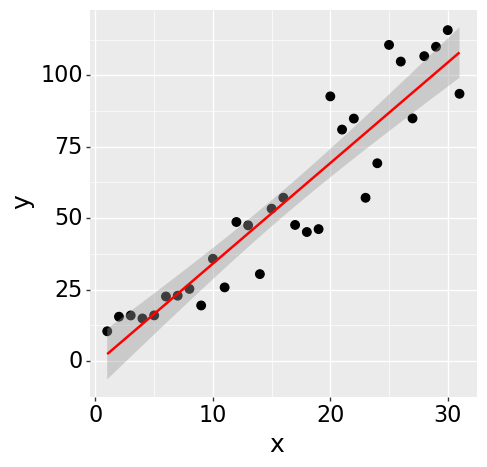

<ggplot: (8778251391589)>


In [92]:
plot_lm=(ggplot( df, aes('x','y')) +
  geom_point(fill="black",colour="black",size=3,shape='o') +
  geom_smooth(method="lm",se=True,colour="red")+ #(h)
  #geom_smooth(method = 'gam',formula='y ~s(x)')+   #(g)
  #geom_smooth(method = 'loess',span=0.4,se=True,colour="#00A5FF",fill="#00A5FF",alpha=0.2)+ #(f)
  scale_y_continuous(breaks = np.arange(0, 126, 25))+
  theme(
      axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
     legend_position="none",
     aspect_ratio =1,
       figure_size = (5, 5),
       dpi = 100
       )
)
print(plot_lm)

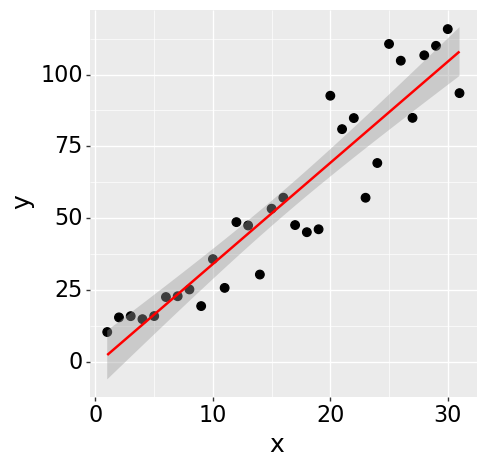

<ggplot: (8778251924805)>


In [93]:
plot_glm=(ggplot( df, aes('x','y')) +
  geom_point(fill="black",colour="black",size=3,shape='o') +
  geom_smooth(method="glm",se=True,colour="red")+ #(h)
  #geom_smooth(method = 'gam')+   #(g)
  #geom_smooth(method = 'loess',span=0.4,se=True,colour="#00A5FF",fill="#00A5FF",alpha=0.2)+ #(f)
  scale_y_continuous(breaks = np.arange(0, 126, 25))+
  theme(
      axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
     legend_position="none",
     aspect_ratio =1,
       figure_size = (5, 5),
       dpi = 100
       )
)
print(plot_glm)

In [96]:
df=pd.read_csv('data/MultiSeries_Scatter_Data.csv')
df.head()

,x,y,label_pred
0,-0.095714,-0.406647,0
1,3.730082,1.836354,1
2,5.760651,2.223426,1
3,0.806121,0.000757,0
4,3.044205,1.601044,1


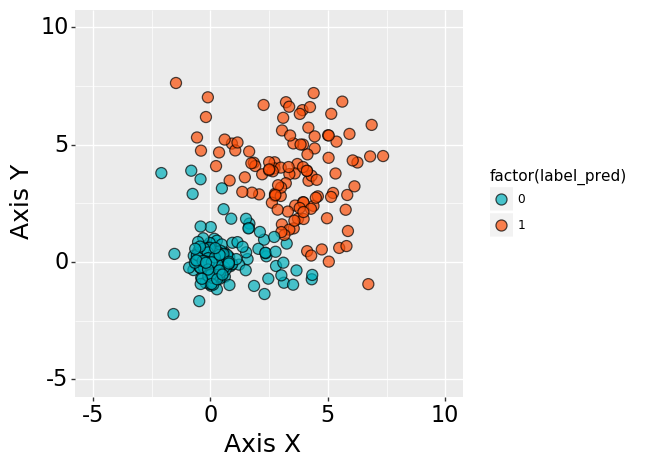

<ggplot: (8778252057645)>


In [98]:
base_plot=(ggplot(df, aes('x','y',shape='factor(label_pred)',fill='factor(label_pred)')) +
     geom_point(size=4,colour="black",alpha=0.7)+
  scale_shape_manual(values=('o','o'))+ # 设置坐标轴
  scale_fill_manual(values=("#00AFBB",  "#FC4E07"))+
  labs(x = "Axis X",y="Axis Y")+ #设置坐标轴的办法
  scale_y_continuous(limits =(-5, 10))+
  scale_x_continuous(limits = (-5, 10))+
  theme(
       #text=element_text(size=15,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       aspect_ratio =1,
       figure_size = (5,5),
       dpi = 100
       )
)
print(base_plot)

In [115]:
df=pd.read_csv('data/ThreeD_Scatter_Data.csv')
df.head()

,mph,Gas_Mileage,Power,Weight,Engine_Displacement
0,23,19,69,821,3687.7
1,13,17,80,1287,4261.4
2,13,22,55,1535,1983.2
3,22,34,55,1037,1770.1
4,14,29,55,1082,1589.8


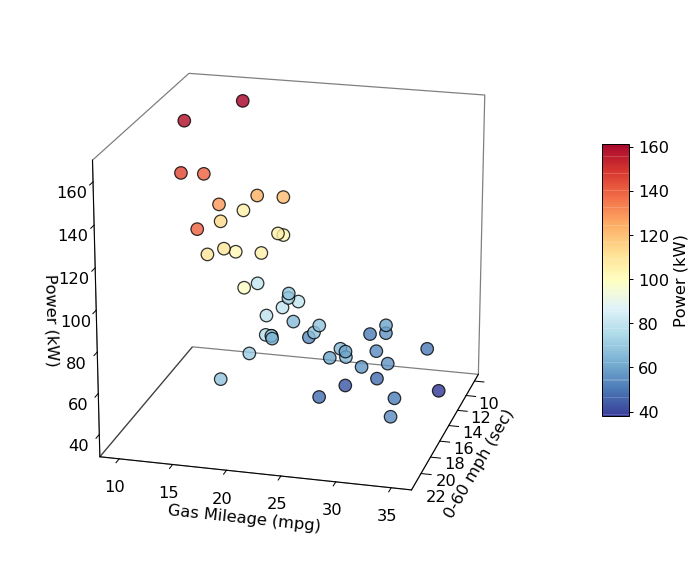

In [116]:
fig = plt.figure(figsize=(10,8),dpi =90)  
#ax =  fig.add_subplot(1, 1, 1,projection='3d')
ax = fig.gca(projection='3d')
#ax.set_aspect('equal','box')
ax.view_init(azim=15, elev=20)
##改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
#--------------------------------------------------------------------------------------
ax.grid(False)

ax.xaxis._axinfo['tick']['outward_factor'] = 0
ax.xaxis._axinfo['tick']['inward_factor'] = 0.4
ax.yaxis._axinfo['tick']['outward_factor'] = 0
ax.yaxis._axinfo['tick']['inward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0
ax.zaxis._axinfo['tick']['inward_factor'] = 0.4
# =============================================================================
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# =============================================================================

ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
# =============================================================================

p=ax.scatter3D(df.mph, df.Gas_Mileage, df.Power,c=df.Power,s=100,
             cmap='RdYlBu_r',edgecolor='k',alpha=0.8)

ax.set_xlabel('0-60 mph (sec)')
ax.set_ylabel('Gas Mileage (mpg)')
ax.set_zlabel('Power (kW)')

cbar=fig.colorbar(p, shrink=0.5,aspect=10)
cbar.set_label('Power (kW)')

plt.show()
#fig.savefig('三维散点图1.pdf')

In [113]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv("data/iris.data", names=names) #读取csv数据
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


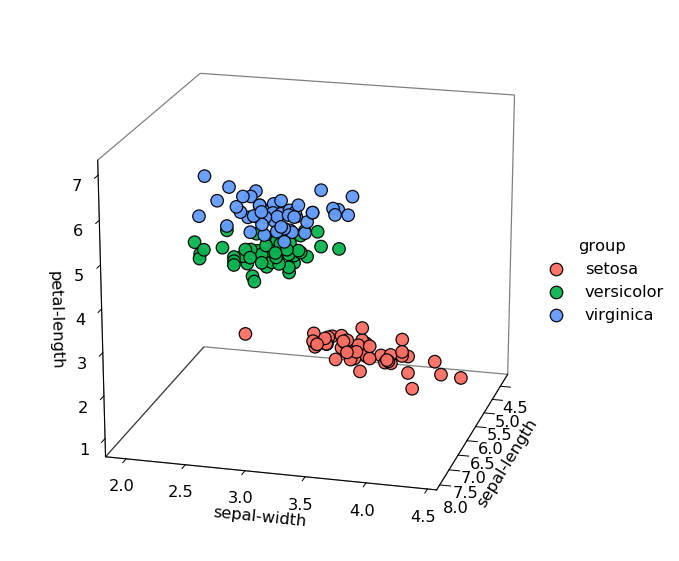

In [114]:
fig = plt.figure(figsize=(8.5,8),dpi =90)  
ax =  fig.add_subplot(111,projection='3d')
#ax.set_aspect('equal','box')
ax.view_init(azim=15, elev=20)
##改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
#--------------------------------------------------------------------------------------
ax.grid(False)

ax.xaxis._axinfo['tick']['outward_factor'] = 0
ax.xaxis._axinfo['tick']['inward_factor'] = 0.4
ax.yaxis._axinfo['tick']['outward_factor'] = 0
ax.yaxis._axinfo['tick']['inward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0
ax.zaxis._axinfo['tick']['inward_factor'] = 0.4
# =============================================================================
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# =============================================================================

ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
# =============================================================================
group=np.unique(df['class'])
label=[x.split("-")[1] for x in group]
color = sns.husl_palette(len(group),h=15/360, l=.65, s=1).as_hex() 

for i in range(len(group)):
    df_temp=df[df['class']==group[i]]
    ax.scatter3D(df_temp['sepal-length'], df_temp['sepal-width'], df_temp['petal-length'],c=color[i],
                 s=100,edgecolor='k',alpha=0.95,label=label[i])

ax.set_xlabel('sepal-length')
ax.set_ylabel('sepal-width')
ax.set_zlabel('petal-length')

plt.legend(title='group',loc="center",bbox_to_anchor=(1.0, 0, 0, 1),edgecolor='none',facecolor='none')
plt.show()

# 柱状图

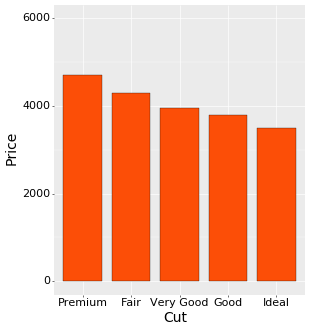

<ggplot: (8778259448697)>


In [58]:
mydata=pd.DataFrame({'Cut':["Fair","Good","Very Good","Premium","Ideal"],
                     'Price':[4300,3800,3950,4700,3500]})

Sort_data=mydata.sort_values(by='Price', ascending=False)

#Sort_data['Cut']=Sort_data['Cut'].astype("category",categories=Sort_data['Cut'],ordered=True)

Sort_data['Cut']=pd.Categorical(Sort_data['Cut'],ordered=True, categories=Sort_data['Cut'])

base_plot=(ggplot(Sort_data,aes('Cut','Price'))
+geom_bar(stat = "identity", width = 0.8,colour="black",size=0.25,fill="#FC4E07",alpha=1)  
+ylim(0, 6000) # 设置y轴的刻度
+theme(
       axis_title = element_text(size=20,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       aspect_ratio = 1.15,
       figure_size = (6.5, 6.5),
       dpi = 50
       )
)
print(base_plot)
#base_plot.save('Bar_Plot.pdf')


In [60]:
#------------------------(b)双数剧系列柱形图---------------------------------------------  

df=pd.read_csv('data/MultiColumn_Data.csv')
df=df.sort_values(by='1996', ascending=False)
mydata=pd.melt(df, id_vars='Catergory')

mydata['Catergory']=pd.Categorical(mydata['Catergory'],ordered=True, categories=df['Catergory'])
mydata

,Catergory,variable,value
0,Temporary\nStream,1996,7.67
1,Permanent\nStream,1996,4.02
2,Lake,1996,3.95
3,Temporary\nStream,1997,5.84
4,Permanent\nStream,1997,6.45
5,Lake,1997,6.76


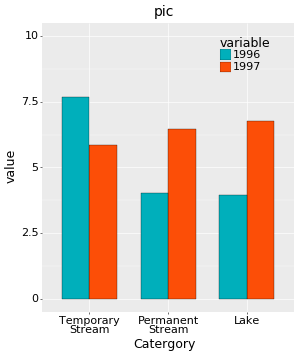

<ggplot: (8778252588113)>


In [63]:
base_plot=(ggplot(mydata,aes(x='Catergory',y='value',fill='variable'))
+geom_bar(stat="identity", color="black", position='dodge',width=0.7,size=0.25)
+scale_fill_manual(values=["#00AFBB", "#FC4E07", "#E7B800"])
+ylim(0, 10)
+theme(legend_title=element_text(size=18,face="plain",color="black"),
       legend_text=element_text(size=16,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       title = element_text(size=20,face="plain",color="black"),
       legend_background=element_blank(),
       legend_position=(0.75,0.80),
       aspect_ratio =1.15,
       figure_size = (6.5, 6.5),
       dpi = 50
       )
+ggtitle('pic')
)
print(base_plot)

In [54]:
df=pd.read_csv('data/StackedColumn_Data.csv')
df

,Clarity,I1,SI2,SI1,VS2,VS1,S2,S1,IF
0,Fair,150,400,390,300,130,100,100,150
1,Good,1200,1100,1700,900,790,1300,1200,1100
2,Very_Good,1300,2300,3300,1900,1800,1900,1700,1300
3,Premium,2800,2900,3500,2800,3000,1800,1600,1280
4,Ideal,2000,2700,4200,3300,4200,2700,2100,1300


In [53]:
#------------------------(c)堆积柱形图---------------------------------------------  

Sum_df=df.iloc[:,1:].apply(lambda x: x.sum(), axis=0).sort_values(ascending=False)

meanRow_df=df.iloc[:,1:].apply(lambda x: x.mean(), axis=1)

Sing_df=df['Clarity'][meanRow_df.sort_values(ascending=True).index]

mydata=pd.melt(df,id_vars='Clarity')
var = CategoricalDtype(categories= Sum_df.index,ordered=True)
mydata['variable'] = mydata['variable'].astype(var)
clar = CategoricalDtype(categories= Sing_df,ordered=True)
mydata['Clarity']=mydata['Clarity'].astype(clar)
mydata.head(10)

,Clarity,variable,value
0,Fair,I1,150
1,Good,I1,1200
2,Very_Good,I1,1300
3,Premium,I1,2800
4,Ideal,I1,2000


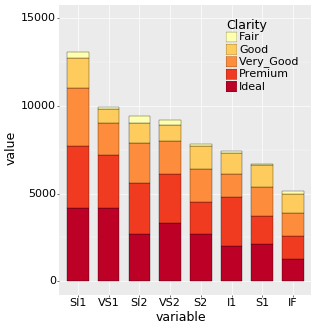

<ggplot: (8778252871997)>


In [51]:
base_plot=(ggplot(mydata,aes(x='variable',y='value',fill='Clarity'))
+geom_bar(stat="identity", color="black", position='stack',width=0.7,size=0.25)
+scale_fill_brewer(palette="YlOrRd")
+ylim(0, 15000)
+theme(
       legend_title=element_text(size=18,face="plain",color="black"),
       legend_text=element_text(size=16,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       legend_background=element_blank(),
       legend_position=(0.75,0.75),
       aspect_ratio =1.15,
       figure_size = (6.5, 6.5),
       dpi = 50
       )
)
print(base_plot)
#base_plot.save('Bar_Plot3.pdf')

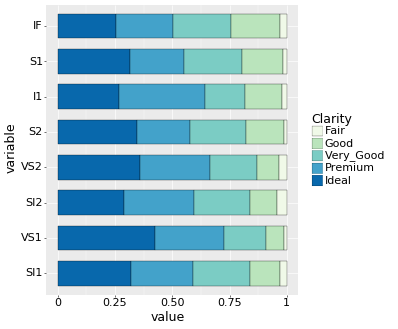

<ggplot: (8778252939893)>


In [64]:
#---------------------------------(d)百分比堆积柱形图------------------------------------------------
df=pd.read_csv('data/StackedColumn_Data.csv')

SumCol_df=df.iloc[:,1:].apply(lambda x: x.sum(), axis=0)

df.iloc[:,1:]=df.iloc[:,1:].apply(lambda x: x/SumCol_df, axis=1)

meanRow_df=df.iloc[:,1:].apply(lambda x: x.mean(), axis=1)

Per_df=df.iloc[meanRow_df.idxmax(),1:].sort_values(ascending=False)

Sing_df=df['Clarity'][meanRow_df.sort_values(ascending=True).index]

mydata=pd.melt(df,id_vars='Clarity')
var = CategoricalDtype(categories= Sum_df.index,ordered=True)
mydata['variable'] = mydata['variable'].astype(var)
clar = CategoricalDtype(categories= Sing_df,ordered=True)
mydata['Clarity']=mydata['Clarity'].astype(clar)


base_plot=(ggplot(mydata,aes(x='variable',y='value',fill='Clarity'))
+geom_bar(stat="identity", color="black", position='fill',width=0.7,size=0.25)
+scale_fill_brewer(palette="GnBu")
#+ylim(0, 10)
+theme(
       #text=element_text(size=15,face="plain",color="black"),
       legend_title=element_text(size=18,face="plain",color="black"),
       legend_text=element_text(size=16,face="plain",color="black"),
       axis_title=element_text(size=18,face="plain",color="black"),
       axis_text = element_text(size=16,face="plain",color="black"),
       aspect_ratio =1.15,
       figure_size = (6.5, 6.5),
       dpi = 50
       )
+coord_flip() # 控制其进行旋转
)
print(base_plot)
#base_plot.save('Bar_Plot4.pdf')

# 统计直方图,核密度估计图

In [152]:
df=pd.read_csv('data/Hist_Density_Data.csv')
df.head()

,Unnamed: 0,MXSPD,Location
0,8035,15.0,Adelaide
1,8036,18.1,Adelaide
2,8037,16.9,Adelaide
3,8038,18.1,Adelaide
4,8039,16.9,Adelaide


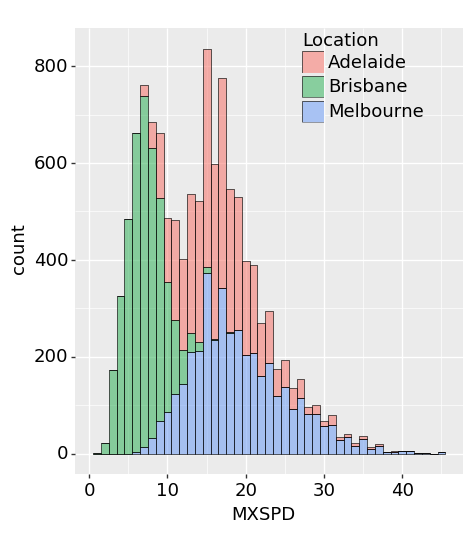

<ggplot: (8778078018401)>


In [155]:
#file.close()  # 关闭文件
#--------------------------------------------(a2) 多数剧系列直方图-----------------------------------
base_hist=(ggplot(df, aes(x='MXSPD', fill='Location'))+
  geom_histogram(binwidth = 1,alpha=0.55,colour="black",size=0.25)+#, aes(fill = ..count..) )
  scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')+
  theme(
    text=element_text(size=13,color="black"),
    plot_title=element_text(size=15,family="myfont",face="bold.italic",hjust=.5,color="black"),#,
    legend_position=(0.7,0.8),
    legend_background = element_blank(),
    aspect_ratio =1.15,
    figure_size=(5,5)
  ))
print(base_hist)

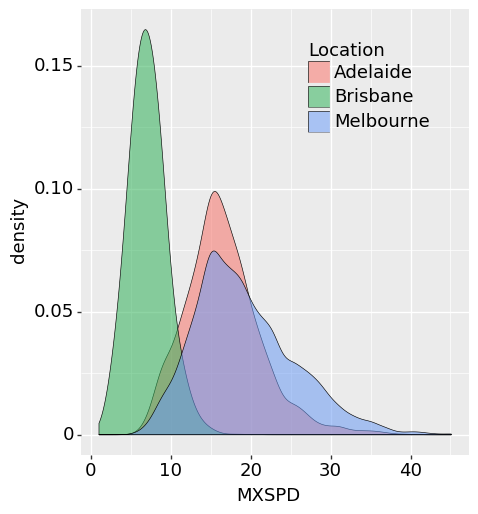

<ggplot: (8778078017593)>


In [154]:
#----------------------------------------(b2)多数剧系列核密度估计图----------------------------------
base_density=(ggplot(df, aes(x='MXSPD',  fill='Location'))+ 
  geom_density(bw=1,alpha=0.55,colour="black",size=0.25,kernel="gaussian")+
  scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')+
  theme(
    text=element_text(size=13,color="black"),
    plot_title=element_text(size=15,family="myfont",face="bold.italic",hjust=.5,color="black"),#,
    legend_position=(0.7,0.75),
    legend_background = element_blank(),
    aspect_ratio =1.15,
    figure_size=(5,5)
  ))
print(base_density)

# 折线图

In [171]:
df=pd.read_csv('data/Line_Data.csv')
df.head()
from datetime import datetime
df['date']=[datetime.strptime(d, '%Y/%m/%d').date() for d in df['date']]#df['date'].map(lambda x:datetime.datetime.strptime(x, '%Y/%m/%d').date())

melt_df=pd.melt(df,id_vars=["date"],var_name='variable',value_name='value')


/root/anaconda3/lib/python3.7/site-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


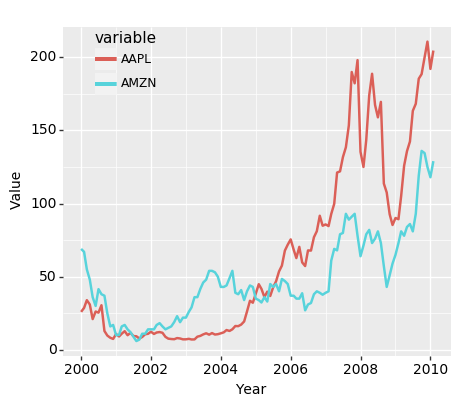

<ggplot: (8778078222241)>


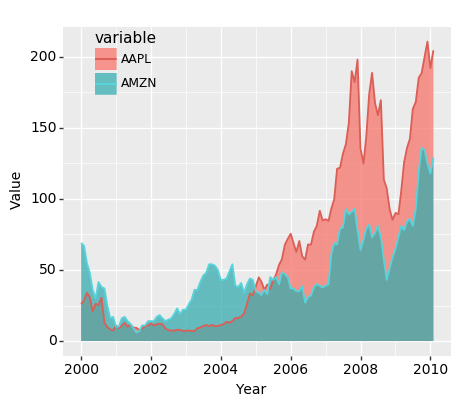

<ggplot: (8778078355133)>


In [172]:

#---------------------------------------------图6-1-1 多数据系列图. (a)折线图--------------------
base_plot=(ggplot(melt_df, aes(x ='date', y = 'value',
                               group='variable',color='variable') )+
  #geom_area(fill="#FF6B5E",alpha=0.75)+ 
  geom_line(size=1)+
  scale_x_date(date_labels = "%Y",date_breaks = "2 year")+
  scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')+
  xlab("Year")+ 
  ylab("Value")+
  theme( axis_title=element_text(size=10,face="plain",color="black"),
         axis_text = element_text(size=10,face="plain",color="black"),
         legend_position = (0.25,0.8),
         legend_background = element_blank(),
         aspect_ratio =0.85,
        figure_size = (5, 5),
        dpi = 100
  ))
  
print(base_plot)

#----------------------------------------图6-1-1 多数据系列图.(b)面积图.-------------------------
base_plot=(ggplot(melt_df, aes(x ='date', y = 'value',group='variable') )+
  geom_area(aes(fill='variable'),alpha=0.75,position="identity")+ 
  geom_line(aes(color='variable'),size=0.75)+#color="black",
  scale_x_date(date_labels = "%Y",date_breaks = "2 year")+
  scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')+
  xlab("Year")+ 
  ylab("Value")+
  theme( axis_title=element_text(size=10,face="plain",color="black"),
         axis_text = element_text(size=10,face="plain",color="black"),
         legend_position = (0.25,0.8),
         legend_background = element_blank(),
         aspect_ratio =0.85,
        figure_size = (5, 5),
        dpi = 100
  ))
  
print(base_plot)

# PCA主成分分析

In [174]:
from sklearn.decomposition import PCA
from sklearn import  datasets
# import some data to play with
#-----------------------------------(a) 四维数据的iris数据集-----------------------------------------------------
iris = datasets.load_iris()

X_reduced = PCA(n_components=2).fit_transform(iris.data)
target=pd.Categorical.from_codes(iris.target,iris.target_names)

df=pd.DataFrame(dict(pca1=X_reduced[:, 0],pca2=X_reduced[:, 1],target=target))
df.head()

,pca1,pca2,target
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


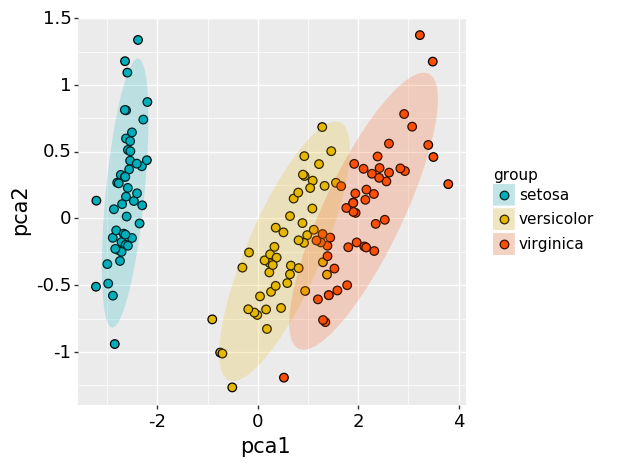

<ggplot: (8778040967877)>


In [179]:
base_plot2=(ggplot(df, aes('pca1','pca2',fill='factor(target)')) +
  geom_point (alpha=1,size=3,shape='o',colour='k')+
  stat_ellipse( geom="polygon", level=0.95, alpha=0.2) +
  scale_fill_manual(values=("#00AFBB", "#E7B800", "#FC4E07"),name='group')+
  theme(
       axis_title=element_text(size=15,face="plain",color="black"),
       axis_text = element_text(size=13,face="plain",color="black"),
       legend_text = element_text(size=11,face="plain",color="black"),
       aspect_ratio =1,
       figure_size = (5,5),
       dpi = 100
       )
)
print(base_plot2)

In [180]:
df = pd.read_csv('data/Tsne_Data.csv')
df = df.set_index('id')

num_rows_sample=5000

df = df.sample(n=num_rows_sample)
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
51123,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_8
61045,0,0,0,1,0,1,0,2,0,0,...,2,1,8,1,0,1,1,0,0,Class_9
2198,0,0,0,0,0,0,0,0,0,0,...,0,4,0,2,0,0,1,0,0,Class_2
33441,2,0,0,1,0,0,0,0,0,0,...,0,5,0,0,0,0,0,3,0,Class_6
20743,0,0,0,0,0,0,0,0,18,0,...,0,0,0,0,0,0,0,0,0,Class_3


/root/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_ellipse : Removed 135 rows containing non-finite values.
/root/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 135 rows containing missing values.


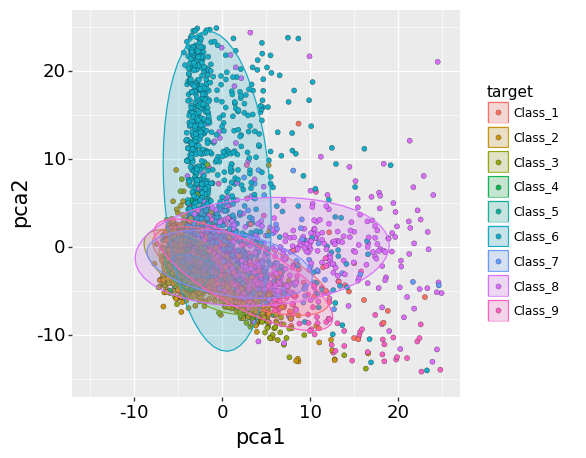

<ggplot: (8778040856449)>


In [181]:
X_reduced = PCA(n_components=2).fit_transform(df.iloc[:,:-1])

df=pd.DataFrame(dict(pca1=X_reduced[:, 0],pca2=X_reduced[:, 1],target=df.iloc[:,-1]))

base_plot2=(ggplot(df, aes('pca1','pca2',fill='target',color='target')) +
   geom_point (alpha=1,size=2,shape='o',colour='k',stroke=0.1)+
  stat_ellipse( geom="polygon", level=0.95, alpha=0.2) +
  xlim(-15,25)+
  ylim(-15,25)+
  scale_fill_hue(s = 0.99, l = 0.65, h=0.0417,color_space='husl')+
  scale_color_hue(s = 0.99, l = 0.65, h=0.0417,color_space='husl')+
  theme(
       #text=element_text(size=15,face="plain",color="black"),
       axis_title=element_text(size=15,face="plain",color="black"),
       axis_text = element_text(size=13,face="plain",color="black"),
       aspect_ratio =1,
       figure_size = (5,5),
       dpi = 100
       )
)
print(base_plot2)

# 箱图

In [162]:
df=pd.read_csv('data/Distribution_Data.csv')
s = CategoricalDtype(categories= ["n", "s", "k", "mm"],ordered=True)
df['class']=df['class'].astype(s)
df.head()

,class,value
0,n,3.918358
1,n,2.556974
2,n,5.834538
3,n,2.255196
4,n,4.443104


/root/anaconda3/lib/python3.7/site-packages/plotnine/themes/theme.py:250: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.


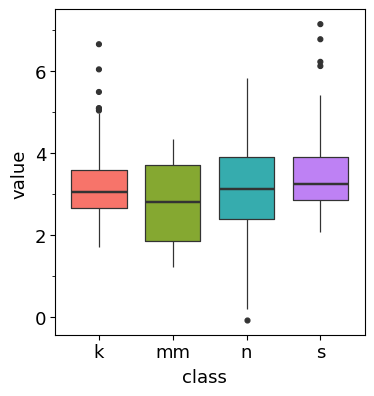

<ggplot: (8778078282409)>


/root/anaconda3/lib/python3.7/site-packages/plotnine/themes/theme.py:250: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.


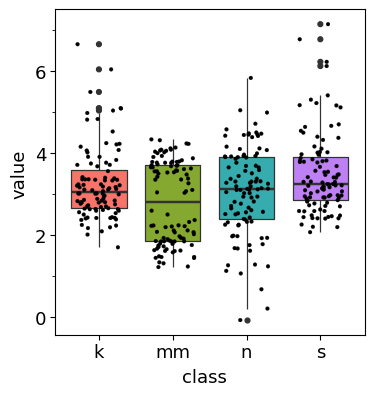

<ggplot: (8778078387717)>


In [161]:
#-------------------------------------------箱型图-------------------------------------------
box_plot=(ggplot(df,aes(x='class',y="value",fill="class"))
+geom_boxplot(show_legend=False)
+scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')
+theme_matplotlib()
+theme(#legend_position='none',
       aspect_ratio =1.05,
       dpi=100,
       figure_size=(4,4)))
print(box_plot)
#box_plot.save("box_plot.pdf") 

box_plot=(ggplot(df,aes(x='class',y="value",fill="class"))
+geom_boxplot(show_legend=False)
+geom_jitter(fill="black",shape=".",width=0.3,size=3,stroke=0.1,show_legend=False)
+scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')
+theme_matplotlib()
+theme(#legend_position='none',
       aspect_ratio =1.05,
       dpi=100,
       figure_size=(4,4)))
print(box_plot)
#box_plot.save("box_plot2.pdf") 

# 坡度图，用于对比两个数据之间的差距

In [71]:
# # -*- coding: utf-8 -*-
#------------------------------------(a)两年份对比--------------------------------------------
df=pd.read_csv('data/Slopecharts_Data1.csv')


left_label=df.apply(lambda x: x['Contry']+','+ str(x['1970']),axis=1)
right_label=df.apply(lambda x: x['Contry']+','+ str(x['1979']),axis=1)
df['class']=df.apply(lambda x: "red" if x['1979']-x['1970']<0 else "green",axis=1)

#list(map(lambda x,y:"red" if x-y<0 else "green", left_label,right_label))

df

,Contry,1970,1979,class
0,Argentina,67,74,green
1,Bangladesh,54,53,red
2,Brazil,62,68,green
3,Canada,73,80,green
4,China,68,72,green
5,Egypt,60,61,green
6,France,74,82,green
7,India,57,58,green
8,Indonesia,59,63,green
9,Iran,64,65,green


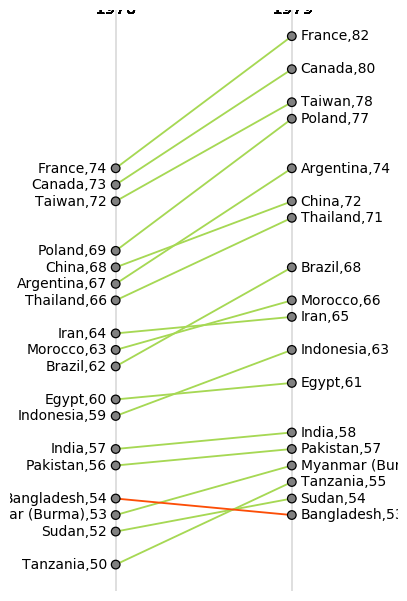

<ggplot: (8778254606057)>


In [72]:
base_plot=(ggplot(df) + 
  geom_segment(aes(x=1, xend=2, y='1970', yend='1979', color='class'), size=.75, show_legend=False) +  #连接线
  geom_vline(xintercept=1, linetype="solid", size=.1) + # 1952年的垂直直线
  geom_vline(xintercept=2, linetype="solid", size=.1) + # 1957年的垂直直线
  geom_point(aes(x=1, y='1970'), size=3,shape='o',fill="grey",color="black") + # 1952年的数据点
  geom_point(aes(x=2, y='1979'), size=3,shape='o',fill="grey",color="black") + # 1957年的数据点
  scale_color_manual(labels = ("Up", "Down"), values = ("#A6D854","#FC4E07")) +  
  xlim(.5, 2.5) )
# 添加文本信息
base_plot=( base_plot + geom_text(label=left_label, y=df['1970'], x=0.95,  size=10,ha='right')
+ geom_text(label=right_label, y=df['1979'], x=2.05, size=10,ha='left')
+ geom_text(label="1970", x=1, y=1.02*(np.max(np.max(df[['1970','1979']]))),  size=12)   
+ geom_text(label="1979", x=2, y=1.02*(np.max(np.max(df[['1970','1979']]))),  size=12) 
+theme_void()
+  theme(
    aspect_ratio =1.5,
    figure_size = (5, 6),
     dpi = 100
  )
)
print(base_plot)

In [68]:
df=pd.read_csv('data/Slopecharts_Data2.csv')

df['group']=df.apply(lambda x: "green" if x['2007']>x['2013'] else "red",axis=1)

df2=pd.melt(df, id_vars=["continent",'group'])

df2.value=df2.value.astype(int)
df2.variable=df2.variable.astype(int)

left_label =df2.apply(lambda x:  x['continent']+','+ str(x['value']) if x['variable']==2007 else "",axis=1)
right_label=df2.apply(lambda x:  x['continent']+','+ str(x['value']) if x['variable']==2013 else "",axis=1)

left_point=df2.apply(lambda x: x['value'] if x['variable']==2007 else np.nan,axis=1)
right_point=df2.apply(lambda x: x['value'] if x['variable']==2013 else np.nan,axis=1)

df2

,continent,group,variable,value
0,Germany,red,2007,2428500
1,United Kingdom,green,2007,2054237
2,France,red,2007,1886792
3,Italy,red,2007,1554198
4,Spain,red,2007,1053161
...,...,...,...,...
93,Portugal,red,2013,172647
94,Hungary,red,2013,100059
95,Slovakia,red,2013,75123
96,Lithuania,red,2013,34545


/root/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 84 rows containing missing values.
/root/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 84 rows containing missing values.
/root/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_text : Removed 80 rows containing missing values.
/root/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_text : Removed 80 rows containing missing values.


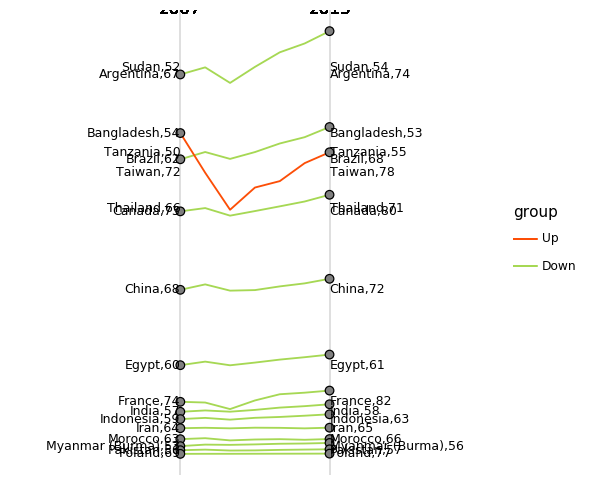

<ggplot: (8778254662305)>


In [77]:
base_plot=( ggplot(df2) + 
  geom_line(aes(x='variable', y='value',group='continent', color='group'),size=.75) + 
  geom_vline(xintercept=2007, linetype="solid", size=.1) + 
  geom_vline(xintercept=2013, linetype="solid", size=.1) +
  geom_point(aes(x='variable', y=left_point), size=3,shape='o',fill="grey",color="black") + 
  geom_point(aes(x='variable', y=right_point), size=3,shape='o',fill="grey",color="black") + 
  scale_color_manual(labels = ("Up", "Down"), values = ("#FC4E07",  "#A6D854")) +  
  xlim(2001, 2018) )
base_plot=( base_plot + geom_text(label=left_label, y=df2['value'], x=2007,  size=9,ha='right')
+ geom_text(label=right_label, y=df2['value'], x=2013, size=9,ha='left')
+ geom_text(label="2007", x=2007, y=1.05*(np.max(df2.value)),  size=12)   
+ geom_text(label="2013", x=2013, y=1.05*(np.max(df2.value)),  size=12) 
+theme_void()
+  theme(
    aspect_ratio =1,
    figure_size = (6, 4),
     dpi = 100
  )
)
print(base_plot)

# 瀑布图,处理时序数据，各个点之间的变化趋势

In [135]:
df=pd.read_csv('data/Facting_Data.csv')
df.head()

,X_Axis,60,55,50,45,40,35,30,25
0,360,7.6821,7.3053,6.0619,7.6628,8.3848,9.2971,9.2372,8.6967
1,370,7.1166,7.0108,6.5378,7.7374,8.4002,9.1590,9.0612,7.8567
2,380,6.2423,6.3366,6.1613,6.9001,7.4425,8.1681,7.7771,6.9062
3,390,5.3379,5.5059,5.4587,5.8385,6.2378,6.7344,6.3799,5.7448
4,400,4.4369,4.5943,4.5685,4.7075,4.9636,5.3273,5.0153,4.4864


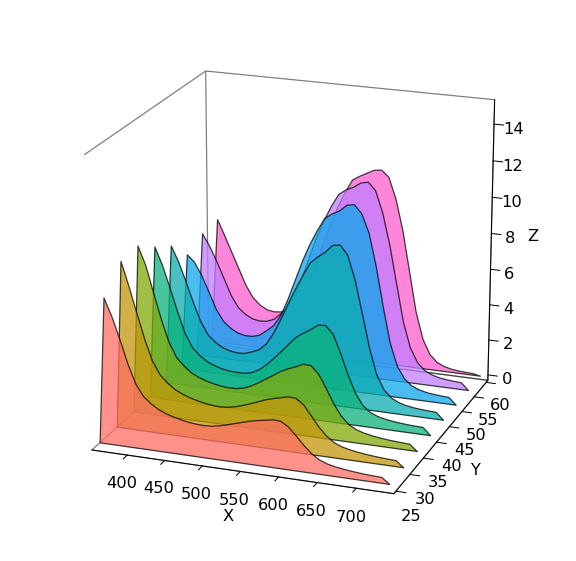

In [121]:
fig = plt.figure(figsize=(8,8),dpi =90)  
ax = fig.gca(projection='3d')
ax.view_init(azim=-70, elev=20)##改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
ax.grid(False)
ax.xaxis._axinfo['tick']['outward_factor'] = 0
ax.xaxis._axinfo['tick']['inward_factor'] = 0.4
ax.yaxis._axinfo['tick']['outward_factor'] = 0
ax.yaxis._axinfo['tick']['inward_factor'] = 0.4
ax.zaxis._axinfo['tick']['outward_factor'] = 0
ax.zaxis._axinfo['tick']['inward_factor'] = 0.4
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
xs = df['X_Axis'].values
verts = []
zs = np.arange(25,65,5)
for z in zs:
    ys =df[str(z)].values
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))
pal_husl = sns.husl_palette(len(zs),h=15/360, l=.65, s=1).as_hex() 

poly = PolyCollection(verts, facecolors=pal_husl,edgecolor='k')
poly.set_alpha(0.75)
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('X')
ax.set_xlim3d(360, 740)
ax.set_ylabel('Y')
ax.set_ylim3d(25, 60)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 15)
plt.show()

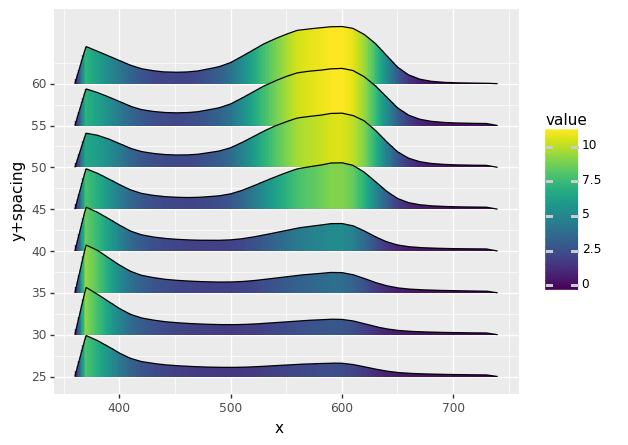

<ggplot: (8778252709361)>


In [123]:
from scipy import interpolate
df_melt=pd.melt(df,id_vars='X_Axis',var_name='var',value_name='value')
mydata=pd.DataFrame( columns=['x','y','var'])       
list_var=np.unique(df_melt['var'])
N=300
for i in list_var:
    x=df.loc[:,'X_Axis']
    y=df.loc[:,i]
    f = interpolate.interp1d(x,y)#, kind='slinear')#kind='linear', 
    x_new=np.linspace(np.min(x),np.max(x),N)
    y_new=f(x_new)
    mydata = mydata.append(pd.DataFrame({'x': x_new,'y':y_new,'var':np.repeat(i,N)}))

height=8
s = CategoricalDtype(categories= np.unique(df_melt['var']),ordered=True)
mydata['var']=mydata['var'].astype(s)
mydata['spacing']=mydata['var'].values.codes*height

labels=np.unique(df_melt['var'])
breaks=np.arange(0,len(labels)*height,height)

base_plot=(ggplot())
for i in np.unique(df_melt['var'])[::-1]:
    mydata_temp=mydata[mydata['var']==i]
    base_plot=(base_plot+
               geom_linerange(mydata_temp,aes(x='x',ymin='spacing',ymax='y+spacing',color='y'),size=1)+
               geom_line(mydata_temp,aes(x='x',y='y+spacing'),color="black",size=0.5))
base_plot=(base_plot+scale_color_cmap(name ='Spectral_r')+
           scale_y_continuous(breaks=breaks,labels=labels)+
           guides(color=guide_colorbar(title='value'))+
           theme(dpi=100,figure_size=(6,5))) 
print(base_plot)

# 相关系数图

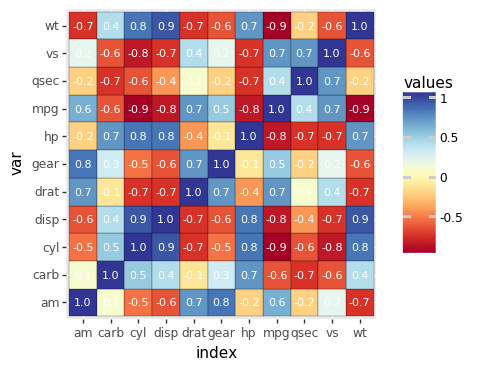

<ggplot: (8778078021709)>


In [148]:
from plotnine.data import mtcars
mat_corr=np.round(mtcars.corr(),1).reset_index()
mydata=pd.melt(mat_corr,id_vars='index',var_name='var',value_name='value')
mydata['AbsValue']=np.abs(mydata.value)


#------------------------------------------------(f) 带标签的热力图-----------------------------------
base_plot=(ggplot(mydata, aes(x ='index', y ='var', fill = 'value',label='value')) +  
  geom_tile(colour="black") +
  geom_text(size=8,colour="white")+
  scale_fill_cmap(cmap_name='RdYlBu',name ='values')+
#   scale_fill_hue(s = 1, l = 0.65, h=0.0417,color_space='husl')+
  coord_equal()+
    theme(dpi=100,figure_size=(4,4)))
print(base_plot)

# 相互散点图

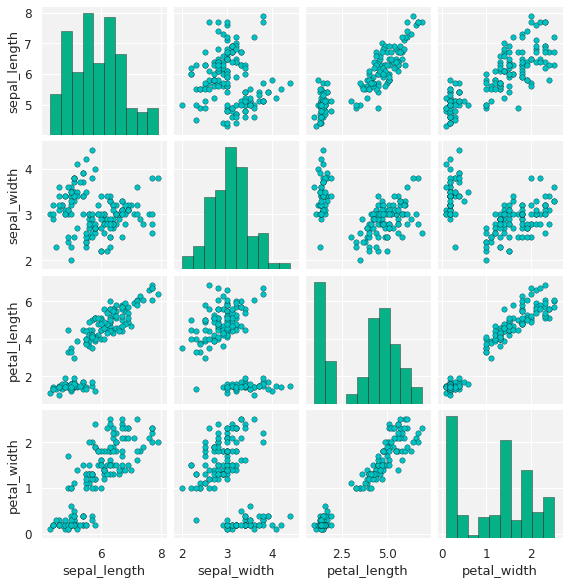

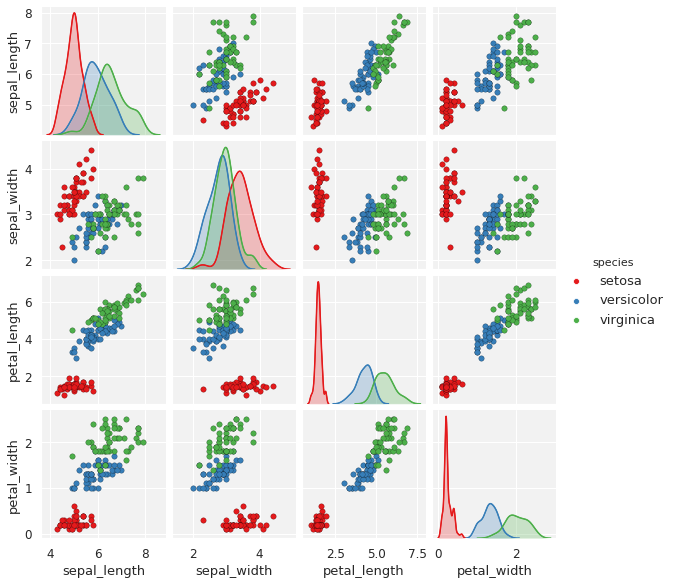

In [182]:
sns.set_style("darkgrid",{'axes.facecolor': '.95'})
sns.set_context("notebook", font_scale=1.5,
                rc={'axes.labelsize': 13, 'legend.fontsize':13, 
                    'xtick.labelsize': 12,'ytick.labelsize': 12})

df = sns.load_dataset("iris")

#------------------------------------(a) 单数据系列-------------------------------------------------

g=sns.pairplot(df, height =2)

g = g.map_diag(plt.hist,color='#00C07C',density=False,edgecolor="k",bins=10,alpha=0.8,linewidth=0.5)
g = g.map_offdiag(plt.scatter, color='#00C2C2',edgecolor="k", s=30,linewidth=0.25)

plt.subplots_adjust(hspace=0.05, wspace=0.05)
#g.savefig('Matrix_Scatter2.pdf')

#--------------------------------(b) 多数据系列------------------------------------------------------
g=sns.pairplot(df, hue="species",height =2,palette ='Set1')

g = g.map_diag(sns.kdeplot, lw=1, legend=False)

g = g.map_offdiag(plt.scatter, edgecolor="k", s=30,linewidth=0.2)


plt.subplots_adjust(hspace=0.05, wspace=0.05)
plt.show()